# 엣지검출 (Edge Detection)

- 엣지(edge)
    - 배경과 물체 또는 물체와 물체 간의 경계를 말한다.농도의 차이가 나는 곳
- 엣지 검출
    - 엣지는 경계가 되는 부분으로 픽셀값이 급격하게 변하게 되므로 그 변화되는 픽셀들을 찾아낸다. => 미분. 변화율을 찾아내는 것
    - threshold(임계점)를 이용해서 엣지의 기준 지정
    - 한번에 바뀌지는 않고 회색기로 점점 변하므로 곡선형태. 엣지는 여러 픽셀이 될 수 있음
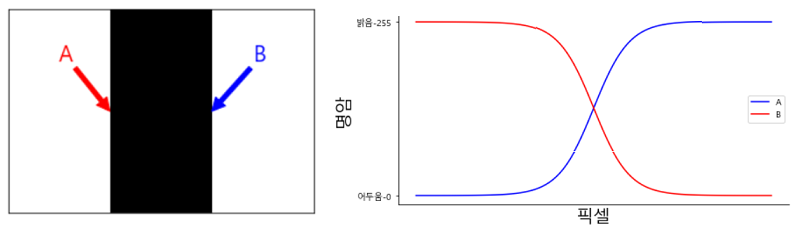
   
   - 엣지 검출을 통해 물체들의 윤곽만 남기고 필요없는 물체나 배경은 제거할 수 있다.
   - Edge detection은 noise의 영향을 많이 받아 일반적으로 **blur를 수행한 후에** Edge detection을 수행
- 엣지 검출을 할 때는 **흑백 이미지**를 사용하는 게 좋음. 2:20 설명 다시 듣기! 

### 엣지 검출과 미분
- 픽셀값의 차이가 큰 부분을 엣지로 판단 하므로 연속된 픽셀값에 미분을 해서 찾아낸다.  
- 그러나 영상의 픽셀값들은 특정 함수에 의해 구해진 값들이 아니므로 미분 근사값을 이용해 구해야 한다.

#### 1차 미분의 근사화
- 전진 차분(Forward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x)}{h}$
- 후진 차분(Backward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x) - f(x-h)}{h}$
- 중앙 차분(Centered difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x-h)}{2h}$
- 엣지 검출에서는 **중앙 차분**을 사용하며 **h(X의 변화)은 픽셀을 말하며** 이전 픽셀 또는 이후 픽셀과의 차이를 확인하는 것이므로 1로 볼 수 있다. 그러나 우리는 변화율을 보는 것이 목적이므로 1/2로 곱하는 것은 하지 않는다.
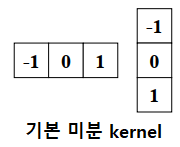

- 주요 미분 커널: 보통 3x3 사용. 컨셉은 같은데 안에 무슨 값을 줄건지. 보통 Sobel필터
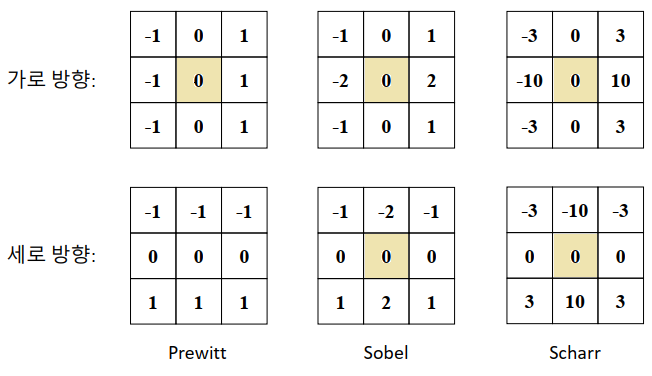

#### Sobel 필터 직접 만들어서 적용

In [3]:
import cv2
import numpy as np

sudoku = cv2.imread('./images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel 필터(커널)
kernel_x = np.array([[-1, 0, 1], # 3차원
                     [-2, 0, 2],
                     [-1, 0, 1]]) # 가로방향
kernel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]]) # 세로방향
x_edge = cv2.filter2D(sudoku, -1, kernel_x) # -1출력결과의 타입: -1은 입력과 동일한 타입
y_edge = cv2.filter2D(sudoku, -1, kernel_y)
edge = cv2.add(x_edge, y_edge)

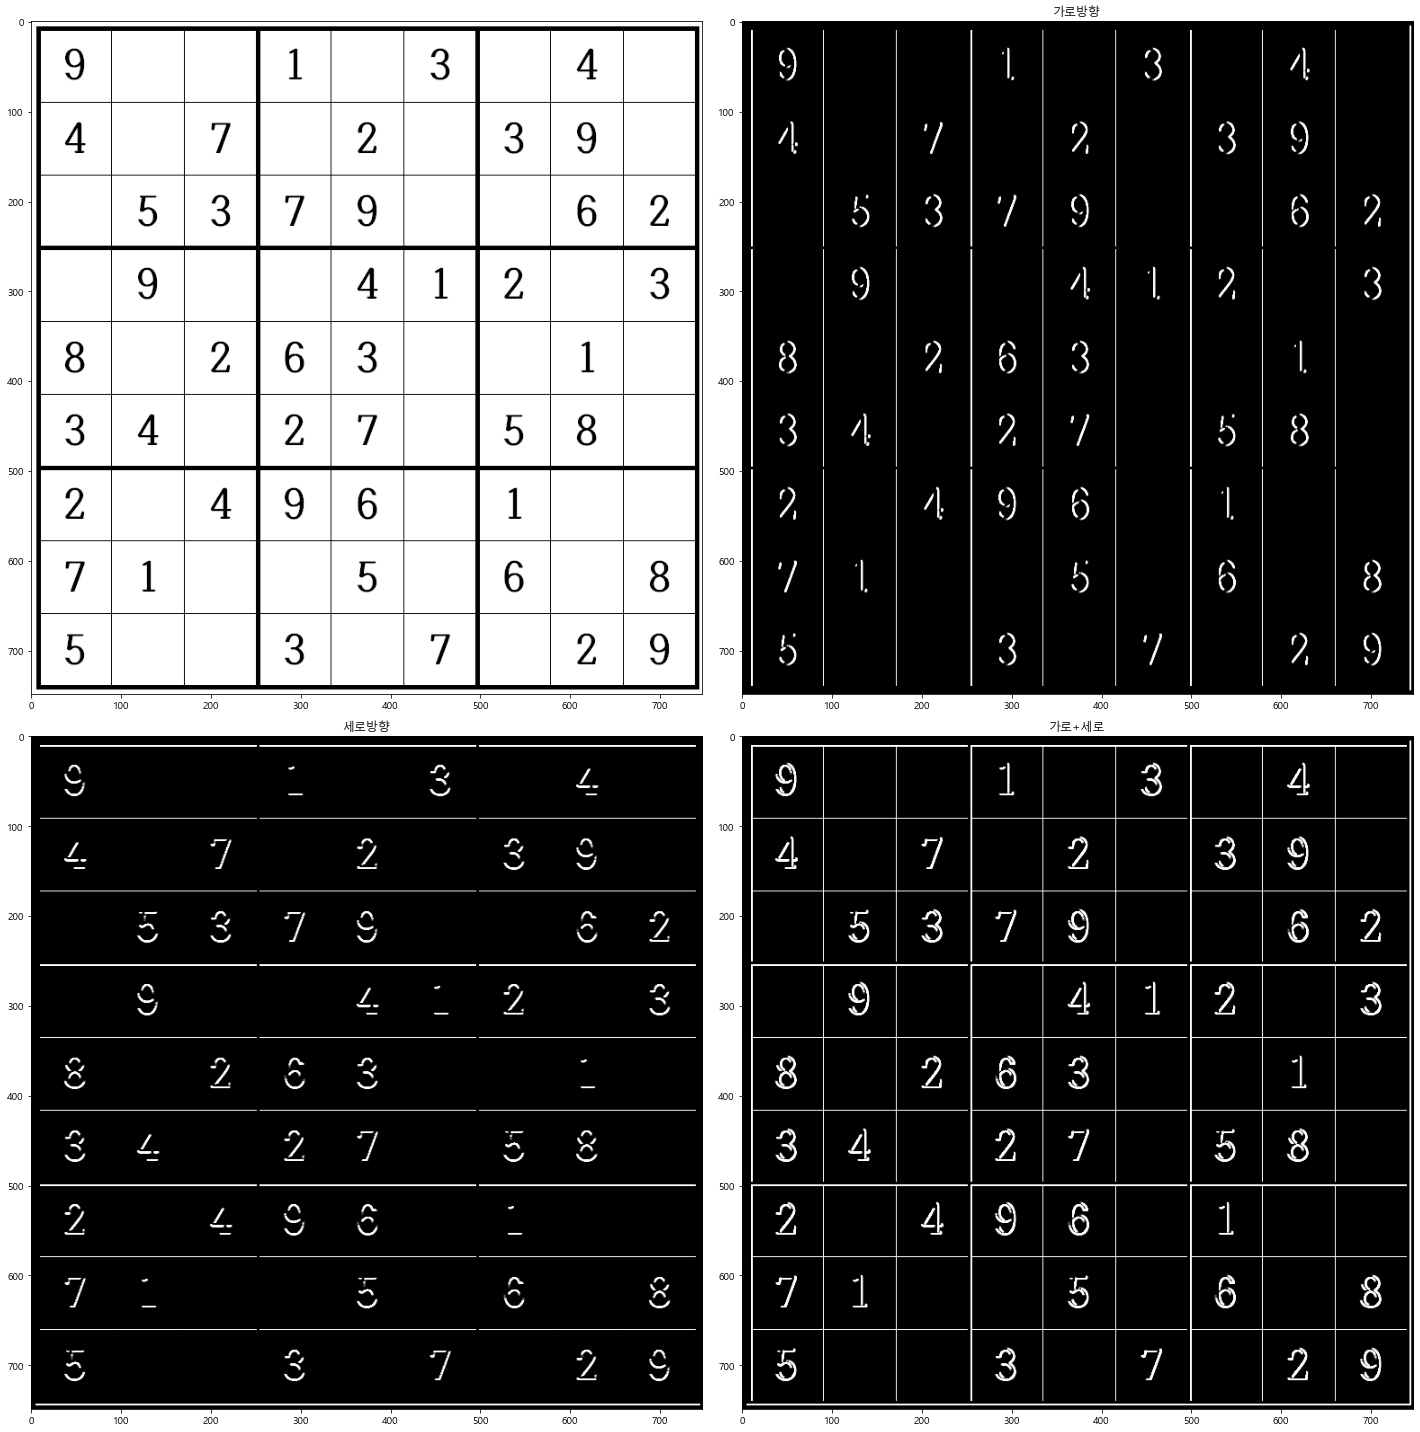

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
row, col = 2, 2 # 튜플 대입
plt.subplot(row, col, 1)
plt.imshow(sudoku, cmap='gray')

plt.subplot(row, col, 2)
plt.imshow(x_edge, cmap='gray')
plt.title('가로방향')

plt.subplot(row, col, 3)
plt.imshow(y_edge, cmap='gray')
plt.title('세로방향')

plt.subplot(row, col, 4)
plt.imshow(edge, cmap='gray')
plt.title('가로+세로')

plt.tight_layout()
plt.show()

# 단순히 필터를 쓰는 것은 엣지로 보기 힘듦. 계산을 통해서 엣지로 볼 기준을 정해줘야 함

### Sobel 함수 이용
- **`cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta)`**
    - src: 엣지를 검출할 영상
    - ddepth: 출력 영상의 타입. -1로 지정하면 입력영상과 같은 타입 사용.
    - dx, dy: x/y 방향 미분의 차수
        - dx=1, dy=0 : 가로방향
        - dx=0, dy=1 : 세로방향
    - ksize: 커널의 크기. 보통 3으로 준다.
    - scale: 연산결과에 추가적으로 곱할값. Default: 1
    - delta: 연산결과에 추가적으로 더할값. Default: 0
- **`cv2.magnitude(x, y)`**
    - x방향, y방향 필터 결과(미분결과)를 합치는 함수. 둘의 중간지점을 찾음
    - x: x방향 미분 결과
    - y: y방향 미분 결과
    
- 문제점 2가지
    - 잡음에 약함
    - 엣지 간 두께가 다름

In [5]:
lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# sb_x = cv2.Sobel(lenna, # 원본
#                  -1, # 출력타입. -1은 입력과 동일한 타입
#                  1,  # x방향 미분,
#                  0,  # y방향 미분,
#                  ksize=3)#, delta=128) # 커널 사이즈 (3,3). 무조건 128을 더하기 때문에 흰색이 아니면 안 보이던 엣지가 회색으로 좀 더 표현됨
# sb_y = cv2.Sobel(lenna, -1, 0, 1, ksize=3)#, delta=128)

sb_x = cv2.Sobel(lenna, cv2.CV_32F, 1, 0, ksize=3) # cv2.CV_32F: float32 => 출력결과를 float32 (0~255로 수렴하지 않는다. 결과값 그대로 유지) => magnitude로 합칠 거기 때문에 함부로 자르지 마라
sb_y = cv2.Sobel(lenna, cv2.CV_32F, 0, 1, ksize=3)
# x, y 방향 엣지를 합치기
mag = cv2.magnitude(sb_x, sb_y)

threshold = 100
edge = np.zeros_like(mag) # 값은 0으로 채워져 있고, 사이즈는 mag과 동일
edge[mag > threshold] = 255  # bool -> pixel값이 threshold 초과인 것은 255, 나머진 0으로 채운다

# 0~255로 수렴시켜주기(정상적인 색깔로 보기 위해)
edge_x = np.clip(sb_x, 0, 255).astype(np.uint8)
edge_y = np.clip(sb_y, 0, 255).astype(np.uint8)
# edge = np.clip(mag, 0, 255).astype(np.uint8)
edge = edge.astype(np.uint8)

In [6]:
np.min(mag), np.max(mag), np.min(sb_x), np.max(sb_x)
# 255를 넘어가지 않아야 정상적인 색깔로 볼 수 있음. float으로 계산했기 때문에 제한이 없음. uint면 0~255로 잘라주는데

(0.0, 709.0741, -688.0, 640.0)

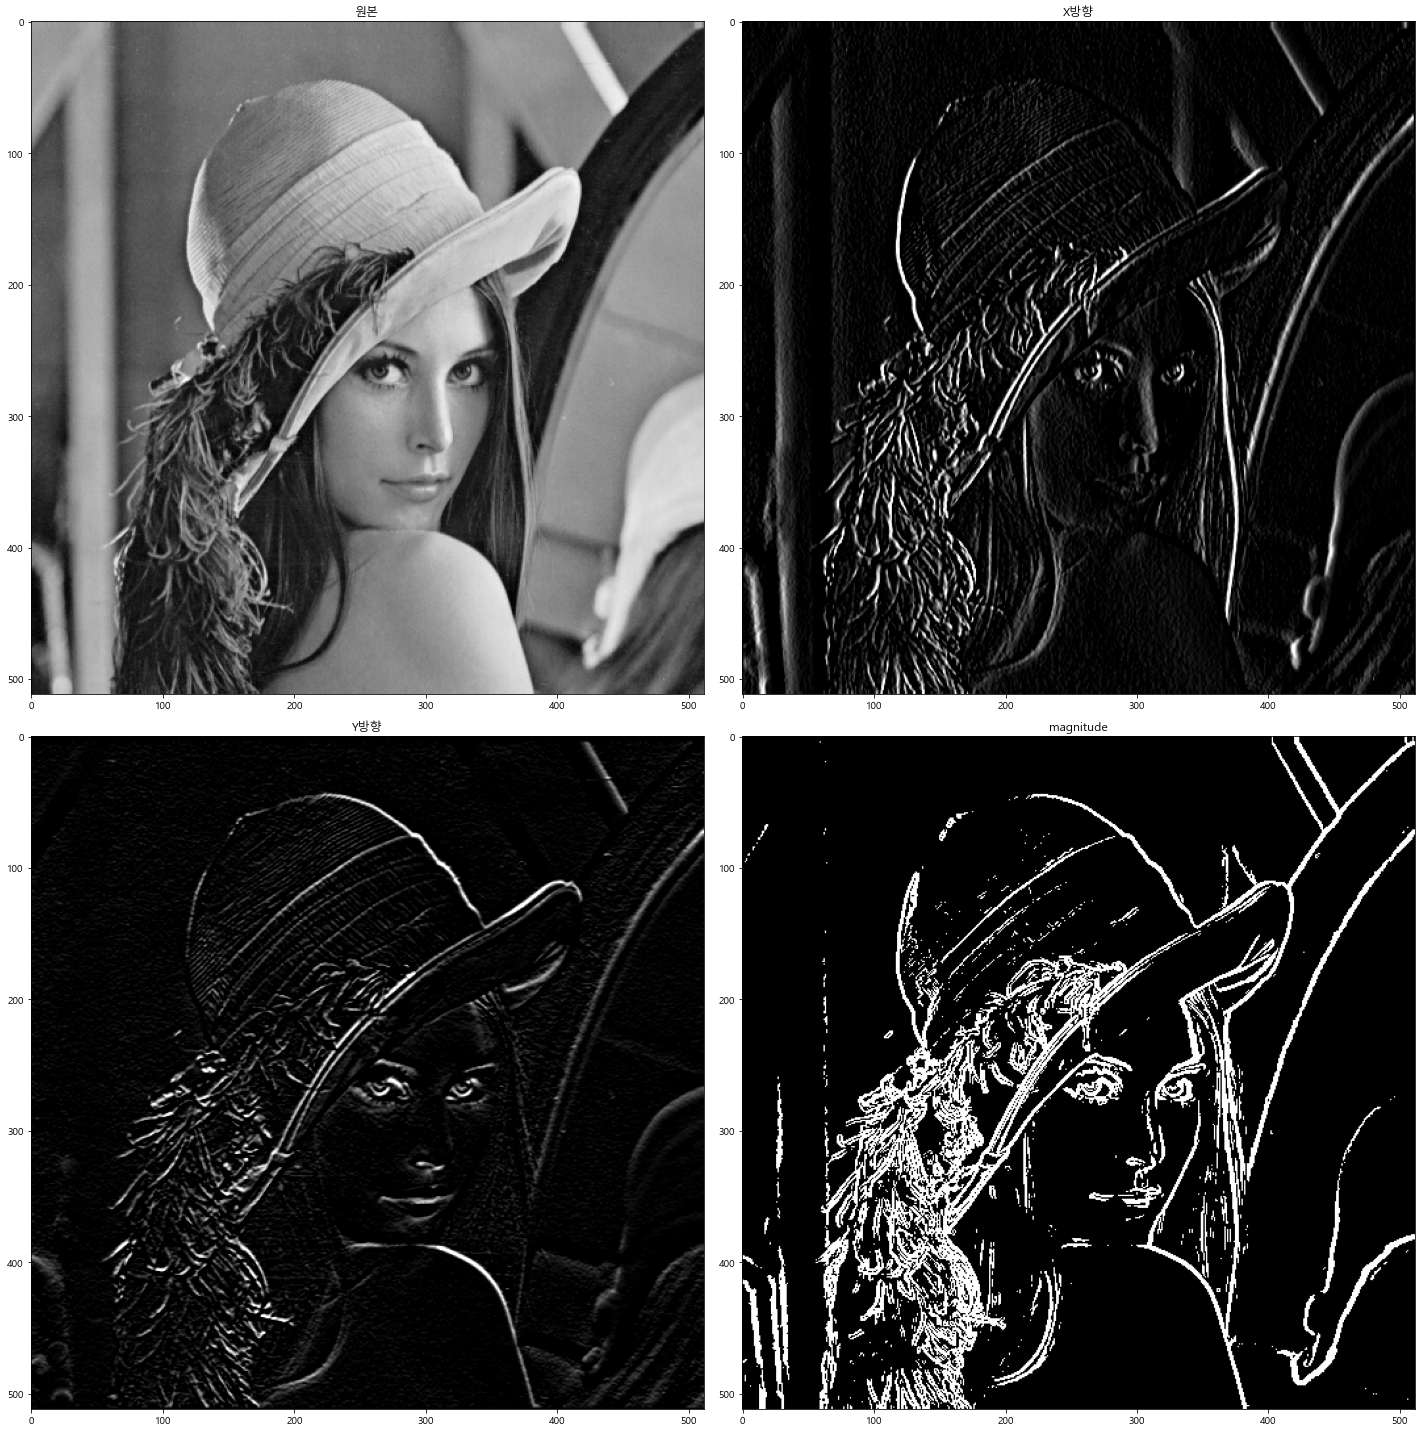

In [40]:
plt.figure(figsize=(20,20))
row, col = 2, 2

plt.subplot(row, col, 1)
plt.imshow(lenna, cmap='gray')
plt.title('원본')

plt.subplot(row, col, 2)
plt.imshow(edge_x, cmap='gray')
plt.title('X방향') # 세로 형태의 경계 찾음

plt.subplot(row, col, 3)
plt.imshow(edge_y, cmap='gray')
plt.title('Y방향') # 가로 형태의 경계 찾음. 배경의 세로 기둥은 아예 안 나옴

plt.subplot(row, col, 4)
plt.imshow(edge, cmap='gray')
plt.title('magnitude')

plt.tight_layout()
plt.show()

# 문제점 2가지
# 1. x, y방향 두 가지 필터를 만들다 보니 한 쪽 방향의 엣지만 잘 찾음 => 단순히 덧셈보다 magnitude로 합치는 게 더 좋음
# 2. 중간중간 잡음들이 흰색으로 좀 표현됨. 모두 농도의 변화 -> 그러나 우리의 목적은 윤곽선을 보고자 함. 무늬, 잡음 등 엣지로서의 불필요한 것들은 안 보이도록
    # 엣지부분은 밝은 흰색. 농도차가 더 크기 때문에. 잡음 같은 것들은 덜 밝은 흰색 => 임계점(threshold)값을 정하기. 
    # 임계점보다 작으면 다 0으로 변경. 실제 임계점보다 큰 값들만 남아서 실제 엣지만 남게 됨
    
# Threshold를 정해주니, 자잘한 잡음들은 사라지고 윤곽들만 남음. 크게 줄수록 적게 남음 => 직접 보면서 지정해줌
# 255로 지정해서 같은 밝기로 나옴

### Canny
- Noise에 강한 Edge Detection
- 내부적으로 Sobel Filter 사용

1. Gaussian Blur를 수행해 Noise를 제거
2. x, y축으로 gradient 계산
3. Gradient 의 방향을 계산 후 Sobel Filtering
4. **Non-Maximum Suppession(NMS)** 수행해서 엣지가 두꺼워지는 것을 방지  
    - 주위(local)에서 가장 큰 값들만 남긴다.
    - Objection Detection에서 중요한 후처리 과정
5. Doubling Thresholding
    - low threshold, high threshold를 기준으로 값들 제거
    - low threshold 이하의 값들 제거
    - low와 high threshold 사이의 값들은 high threshold와 연결된 것만 남기고 연결 안 된 것은 제거 -> 잡음 제거 효과
        - 약한 edge
    - high threshold 이상의 값들은 유지 -> 끊어지는 느낌을 방지하는 효과
        - 강한 edge
        
     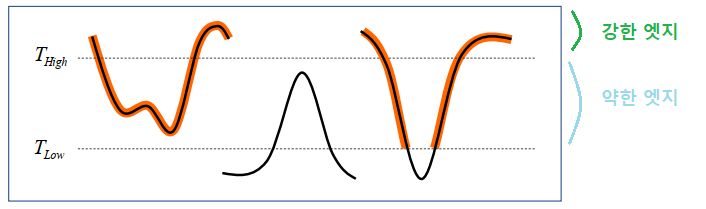

- `cv2.Canny(image, threshold1, threshold2, apertureSize=None)`
    - image: Canny 엣지 검출을 할 원본 이미지
    - threshold1: low threshold
    - threshold2: high threshold
        - threshold1과 threshold2 는 1:2 또는 1:3 정도 비율로 준다.
    - apertureSize: 소벨필터의 커널크기. default: 3

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)
building = cv2.imread('./images/building.jpg', cv2.IMREAD_GRAYSCALE)

In [59]:
canny_img = cv2.Canny(building, 50, 150) # low th: 50, high th: 150 
canny_img2 = cv2.Canny(building, 20, 100) 

# hight th 키움 -> 자잘한 것들이 더 없어짐. th로 인정하는 것들이 줄어들기 때문에
# 그러나 실제 윤곽들도 사라질 수 있음. 이미지 보면서 정해야 함. 보통 50 기준으로 줌

In [60]:
cv2.imshow('src', building)
cv2.imshow('canny', canny_img)
cv2.imshow('canny2', canny_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 두께가 전반적으로 같음. 잡음들이 훨씬 덜 함. 중간중간 끊기는 것들도 없음. low, high threshold들과 연결된 것들 다 연결시켜버리기 때문에 -> 딱 윤곽선만 그려준 느낌

- OpenCV는 딥러닝에서 전처리로서는 사용빈도가 많이 떨어졌음
- 패키지들이 많이 나왔기 때문에
- OpenCV에서는 우리 교재가 가장 좋음